In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd

## Colab Data Download

In [6]:
! pip install gdown

In [7]:
! gdown 'https://drive.google.com/uc?id=1ACGrQS0sX4-26D358G2i5pja1Y6CsGtz'
! gdown 'https://drive.google.com/uc?id=1ONpyuv0vrtd6iUEp0-zzkKqwpm3njEqi'

Downloading...
From: https://drive.google.com/uc?id=1ACGrQS0sX4-26D358G2i5pja1Y6CsGtz
To: /content/goodreads_books_mystery_thriller_crime.json.gz
100% 231M/231M [00:04<00:00, 51.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ONpyuv0vrtd6iUEp0-zzkKqwpm3njEqi
To: /content/goodreads_reviews_mystery_thriller_crime.json.gz
100% 610M/610M [00:14<00:00, 41.7MB/s]


Datasets Directory

In [2]:
DIR = './'

Function to load zipped datasets

In [3]:
def load_data(file_name, head = 500):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            
            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return data

Load and display sample records of books ~/authors/works/series~

## Lieber Pandas Funktion verwenden!

In [4]:
df_books = pd.read_json(os.path.join(DIR, 'goodreads_books_mystery_thriller_crime.json.gz'), lines=True, nrows=20000)

In [5]:
df_reviews = pd.read_json(os.path.join(DIR, 'goodreads_reviews_mystery_thriller_crime.json.gz'), lines=True, nrows=10000)

In [5]:
# books = load_data(os.path.join(DIR, 'goodreads_books_mystery_thriller_crime.json.gz'), 9999999)
# reviews = load_data(os.path.join(DIR, 'goodreads_reviews_mystery_thriller_crime.json.gz'), 9999999)

In [6]:
print(' == sample record (books) ==')
np.random.choice(books)

 == sample record (books) ==


ValueError: ignored

> {'count': '1', 'name': 'لمعرض-الكتاب-2018'},
> 
> 'title': 'Човекът, който знаеше всичко',

auch nicht lateinische Buchstaben! Übersetzen? löschen?

In [16]:
display(type(books[0]))
display(len(books[0]))

dict

29

In [17]:
len(books)

5001

In [7]:
df_books = books
df_reviews = reviews

In [8]:
# df_books = pd.DataFrame(books)
# df_reviews = pd.DataFrame(reviews)

In [6]:
df_books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,184737297X,15,[169353],US,,"[{'count': '159', 'name': 'to-read'}, {'count'...",,false,3.93,B007YLTG5I,"[439108, 522621, 116770, 1275927, 6202655, 840...","London, 1196. At the command of Richard the Li...",Hardcover,https://www.goodreads.com/book/show/6066814-cr...,"[{'author_id': '37778', 'role': ''}]",Simon & Schuster UK,400,6,9781847372970,4,,2009,https://www.goodreads.com/book/show/6066814-cr...,https://images.gr-assets.com/books/1328724803m...,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
1,,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",B01NCIKAQX,true,4.33,B01NCIKAQX,[],,,https://www.goodreads.com/book/show/33394837-t...,"[{'author_id': '242185', 'role': ''}]",,318,,,,,,https://www.goodreads.com/book/show/33394837-t...,https://images.gr-assets.com/books/1493114742m...,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
2,,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",B01ALOWJN0,true,3.49,B01ALOWJN0,[],"BATHS, BANKS AND ROMAN INSURRECTION\nDetective...",,https://www.goodreads.com/book/show/29074697-t...,"[{'author_id': '15104629', 'role': ''}, {'auth...",Amazon Digital Services,,,,,,,https://www.goodreads.com/book/show/29074697-t...,https://s.gr-assets.com/assets/nophoto/book/11...,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...
3,0854563903,8,[408775],US,,"[{'count': '51', 'name': 'to-read'}, {'count':...",,false,3.30,,[],"Gerald breezily introduced his wife, Helen, to...",Hardcover,https://www.goodreads.com/book/show/1902202.De...,"[{'author_id': '190988', 'role': ''}]",Ulverscroft,,1,9780854563906,12,Large Print,1975,https://www.goodreads.com/book/show/1902202.De...,https://s.gr-assets.com/assets/nophoto/book/11...,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
4,8838920931,3,[274410],US,ita,"[{'count': '48', 'name': 'to-read'}, {'count':...",,false,3.54,,[],"""I misteri di Eleusi"" e il quinto romanzo di A...",Paperback,https://www.goodreads.com/book/show/9671977-ar...,"[{'author_id': '337108', 'role': ''}, {'author...",Sellerio,659,,9788838920936,,,2006,https://www.goodreads.com/book/show/9671977-ar...,https://images.gr-assets.com/books/1474788304m...,9671977,22,2152906,Aristotele e i misteri di Eleusi,Aristotele e i misteri di Eleusi


In [7]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn                  20000 non-null  object 
 1   text_reviews_count    20000 non-null  int64  
 2   series                20000 non-null  object 
 3   country_code          20000 non-null  object 
 4   language_code         20000 non-null  object 
 5   popular_shelves       20000 non-null  object 
 6   asin                  20000 non-null  object 
 7   is_ebook              20000 non-null  object 
 8   average_rating        20000 non-null  float64
 9   kindle_asin           20000 non-null  object 
 10  similar_books         20000 non-null  object 
 11  description           20000 non-null  object 
 12  format                20000 non-null  object 
 13  link                  20000 non-null  object 
 14  authors               20000 non-null  object 
 15  publisher          

In [8]:
df_reviews.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,6392944,5e212a62bced17b4dbe41150e5bb9037,3,I haven't read a fun mystery book in a while a...,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,Mon Jul 24 00:00:00 -0700 2017,6,0
1,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
2,8842281e1d1347389f2ab93d60773d4d,32283133,8e4d61801907e591018bdc3442a9cf2b,0,http://www.telegraph.co.uk/culture/10...,Tue Nov 01 11:09:18 -0700 2016,Tue Nov 01 11:09:44 -0700 2016,,,9,0
3,8842281e1d1347389f2ab93d60773d4d,17860739,022bb6daffa49adc27f6b20b6ebeb37d,4,An amazing and unique creation: JJ Abrams and ...,Wed Mar 26 13:51:30 -0700 2014,Tue Sep 23 01:44:36 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,Sat Jul 26 00:00:00 -0700 2014,7,0
4,8842281e1d1347389f2ab93d60773d4d,8694005,0e317947e1fd341f573192111bb2921d,3,The Name of the Rose is a thrilling Dan Brown-...,Wed Sep 08 01:22:27 -0700 2010,Wed Dec 14 12:30:43 -0800 2016,Mon Aug 10 00:00:00 -0700 2015,Mon Jul 20 00:00:00 -0700 2015,17,6


In [9]:
df_books.describe()

,text_reviews_count,average_rating,book_id,ratings_count,work_id
count,20000.000000,20000.000000,2.000000e+04,20000.000000,2.000000e+04
mean,37.546800,3.831713,1.506877e+07,507.123300,1.790644e+07
std,327.306738,0.328335,1.060470e+07,6196.510554,1.832299e+07
min,0.000000,0.000000,2.240000e+02,0.000000,4.340000e+02
25%,2.000000,3.650000,6.129640e+06,11.000000,1.724756e+06
50%,6.000000,3.850000,1.572291e+07,36.000000,1.311646e+07
75%,18.000000,4.040000,2.356296e+07,138.000000,2.702767e+07
max,24868.000000,5.000000,3.645861e+07,575163.000000,5.815831e+07


In [10]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn                  20000 non-null  object 
 1   text_reviews_count    20000 non-null  int64  
 2   series                20000 non-null  object 
 3   country_code          20000 non-null  object 
 4   language_code         20000 non-null  object 
 5   popular_shelves       20000 non-null  object 
 6   asin                  20000 non-null  object 
 7   is_ebook              20000 non-null  object 
 8   average_rating        20000 non-null  float64
 9   kindle_asin           20000 non-null  object 
 10  similar_books         20000 non-null  object 
 11  description           20000 non-null  object 
 12  format                20000 non-null  object 
 13  link                  20000 non-null  object 
 14  authors               20000 non-null  object 
 15  publisher          

nur 275 unique ISBNs, 123 ASIN... hm. ISBN sollte eigentlich schon überall gesetzt sein..

In [11]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

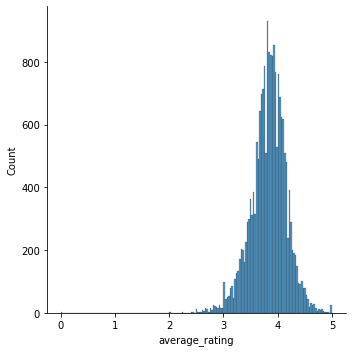

In [12]:
sns.displot(df_books["average_rating"].astype(float))

In [13]:
df_books.style.highlight_max(axis=1)
df_books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,184737297X,15,[169353],US,,"[{'count': '159', 'name': 'to-read'}, {'count'...",,false,3.93,B007YLTG5I,"[439108, 522621, 116770, 1275927, 6202655, 840...","London, 1196. At the command of Richard the Li...",Hardcover,https://www.goodreads.com/book/show/6066814-cr...,"[{'author_id': '37778', 'role': ''}]",Simon & Schuster UK,400,6,9781847372970,4,,2009,https://www.goodreads.com/book/show/6066814-cr...,https://images.gr-assets.com/books/1328724803m...,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
1,,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",B01NCIKAQX,true,4.33,B01NCIKAQX,[],,,https://www.goodreads.com/book/show/33394837-t...,"[{'author_id': '242185', 'role': ''}]",,318,,,,,,https://www.goodreads.com/book/show/33394837-t...,https://images.gr-assets.com/books/1493114742m...,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
2,,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",B01ALOWJN0,true,3.49,B01ALOWJN0,[],"BATHS, BANKS AND ROMAN INSURRECTION\nDetective...",,https://www.goodreads.com/book/show/29074697-t...,"[{'author_id': '15104629', 'role': ''}, {'auth...",Amazon Digital Services,,,,,,,https://www.goodreads.com/book/show/29074697-t...,https://s.gr-assets.com/assets/nophoto/book/11...,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...
3,0854563903,8,[408775],US,,"[{'count': '51', 'name': 'to-read'}, {'count':...",,false,3.30,,[],"Gerald breezily introduced his wife, Helen, to...",Hardcover,https://www.goodreads.com/book/show/1902202.De...,"[{'author_id': '190988', 'role': ''}]",Ulverscroft,,1,9780854563906,12,Large Print,1975,https://www.goodreads.com/book/show/1902202.De...,https://s.gr-assets.com/assets/nophoto/book/11...,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
4,8838920931,3,[274410],US,ita,"[{'count': '48', 'name': 'to-read'}, {'count':...",,false,3.54,,[],"""I misteri di Eleusi"" e il quinto romanzo di A...",Paperback,https://www.goodreads.com/book/show/9671977-ar...,"[{'author_id': '337108', 'role': ''}, {'author...",Sellerio,659,,9788838920936,,,2006,https://www.goodreads.com/book/show/9671977-ar...,https://images.gr-assets.com/books/1474788304m...,9671977,22,2152906,Aristotele e i misteri di Eleusi,Aristotele e i misteri di Eleusi


In [14]:
# b = a['popular_shelves'].apply(pd.Series).merge(a, left_index = True, right_index = True).drop(['popular_shelves',0], axis = 1)
# b.head()


In [15]:
# b.info()

duplicates definitely need to be removed beforehand.
- how to find all of them?
- [ ] same title
- [ ] same kindle_asin
- [ ] very close title (how?)
- [ ] how to combine them? reviews? create an extra index? so the review don't get lost?

In [16]:
# pd.concat(g for _, g in df_books.groupby("title") if len(g) > 1)


In [17]:
df_books.set_index("book_id", inplace=True)
df_reviews.set_index("review_id", inplace=True)

In [18]:
df_reviews

,user_id,book_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
review_id,,,,,,,,,,
5e212a62bced17b4dbe41150e5bb9037,8842281e1d1347389f2ab93d60773d4d,6392944,3,I haven't read a fun mystery book in a while a...,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,Mon Jul 24 00:00:00 -0700 2017,6,0
2ede853b14dc4583f96cf5d120af636f,8842281e1d1347389f2ab93d60773d4d,28684704,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
8e4d61801907e591018bdc3442a9cf2b,8842281e1d1347389f2ab93d60773d4d,32283133,0,http://www.telegraph.co.uk/culture/10...,Tue Nov 01 11:09:18 -0700 2016,Tue Nov 01 11:09:44 -0700 2016,,,9,0
022bb6daffa49adc27f6b20b6ebeb37d,8842281e1d1347389f2ab93d60773d4d,17860739,4,An amazing and unique creation: JJ Abrams and ...,Wed Mar 26 13:51:30 -0700 2014,Tue Sep 23 01:44:36 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,Sat Jul 26 00:00:00 -0700 2014,7,0
0e317947e1fd341f573192111bb2921d,8842281e1d1347389f2ab93d60773d4d,8694005,3,The Name of the Rose is a thrilling Dan Brown-...,Wed Sep 08 01:22:27 -0700 2010,Wed Dec 14 12:30:43 -0800 2016,Mon Aug 10 00:00:00 -0700 2015,Mon Jul 20 00:00:00 -0700 2015,17,6
...,...,...,...,...,...,...,...,...,...,...
162e9428cc714dc7454ef0a559ae4d55,8a8232f778ed15a62df87ccc4c398908,15776309,3,"Told in alternating voices, what makes Reconst...",Thu Apr 25 06:18:45 -0700 2013,Sat Oct 25 14:35:24 -0700 2014,Thu Oct 23 00:00:00 -0700 2014,Tue Oct 21 00:00:00 -0700 2014,0,0
ad973faee87b80b8bfbfd6bb19a37b24,8a8232f778ed15a62df87ccc4c398908,162089,4,"Flawless was just that..great plot, perfect am...",Sat Mar 23 19:55:57 -0700 2013,Sat Mar 23 20:02:24 -0700 2013,Sat Mar 23 00:00:00 -0700 2013,Fri Mar 22 00:00:00 -0700 2013,0,0
f16063c4d371f261be5886a728604b97,8a8232f778ed15a62df87ccc4c398908,162085,3,Sara Shepard has a knack for telling a good su...,Wed Mar 20 17:50:49 -0700 2013,Sat Mar 23 20:14:59 -0700 2013,Fri Mar 22 00:00:00 -0700 2013,,0,0


In [19]:
df_reviews.groupby(level=0).filter(lambda x: len(x) > 1).head()


,user_id,book_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
review_id,,,,,,,,,,


## Column cleaning

In [20]:
df_reviews.drop(columns=['review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'], inplace=True)

In [21]:
df_reviews.head()

,user_id,book_id,rating
review_id,,,
5e212a62bced17b4dbe41150e5bb9037,8842281e1d1347389f2ab93d60773d4d,6392944,3
2ede853b14dc4583f96cf5d120af636f,8842281e1d1347389f2ab93d60773d4d,28684704,3
8e4d61801907e591018bdc3442a9cf2b,8842281e1d1347389f2ab93d60773d4d,32283133,0
022bb6daffa49adc27f6b20b6ebeb37d,8842281e1d1347389f2ab93d60773d4d,17860739,4
0e317947e1fd341f573192111bb2921d,8842281e1d1347389f2ab93d60773d4d,8694005,3


In [22]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 6066814 to 25613187
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn                  20000 non-null  object 
 1   text_reviews_count    20000 non-null  int64  
 2   series                20000 non-null  object 
 3   country_code          20000 non-null  object 
 4   language_code         20000 non-null  object 
 5   popular_shelves       20000 non-null  object 
 6   asin                  20000 non-null  object 
 7   is_ebook              20000 non-null  object 
 8   average_rating        20000 non-null  float64
 9   kindle_asin           20000 non-null  object 
 10  similar_books         20000 non-null  object 
 11  description           20000 non-null  object 
 12  format                20000 non-null  object 
 13  link                  20000 non-null  object 
 14  authors               20000 non-null  object 
 15  publisher 

In [23]:
df_books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,ratings_count,work_id,title,title_without_series
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6066814,184737297X,15,[169353],US,,"[{'count': '159', 'name': 'to-read'}, {'count'...",,false,3.93,B007YLTG5I,"[439108, 522621, 116770, 1275927, 6202655, 840...","London, 1196. At the command of Richard the Li...",Hardcover,https://www.goodreads.com/book/show/6066814-cr...,"[{'author_id': '37778', 'role': ''}]",Simon & Schuster UK,400,6,9781847372970,4,,2009,https://www.goodreads.com/book/show/6066814-cr...,https://images.gr-assets.com/books/1328724803m...,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
33394837,,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",B01NCIKAQX,true,4.33,B01NCIKAQX,[],,,https://www.goodreads.com/book/show/33394837-t...,"[{'author_id': '242185', 'role': ''}]",,318,,,,,,https://www.goodreads.com/book/show/33394837-t...,https://images.gr-assets.com/books/1493114742m...,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
29074697,,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",B01ALOWJN0,true,3.49,B01ALOWJN0,[],"BATHS, BANKS AND ROMAN INSURRECTION\nDetective...",,https://www.goodreads.com/book/show/29074697-t...,"[{'author_id': '15104629', 'role': ''}, {'auth...",Amazon Digital Services,,,,,,,https://www.goodreads.com/book/show/29074697-t...,https://s.gr-assets.com/assets/nophoto/book/11...,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...
1902202,0854563903,8,[408775],US,,"[{'count': '51', 'name': 'to-read'}, {'count':...",,false,3.30,,[],"Gerald breezily introduced his wife, Helen, to...",Hardcover,https://www.goodreads.com/book/show/1902202.De...,"[{'author_id': '190988', 'role': ''}]",Ulverscroft,,1,9780854563906,12,Large Print,1975,https://www.goodreads.com/book/show/1902202.De...,https://s.gr-assets.com/assets/nophoto/book/11...,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
9671977,8838920931,3,[274410],US,ita,"[{'count': '48', 'name': 'to-read'}, {'count':...",,false,3.54,,[],"""I misteri di Eleusi"" e il quinto romanzo di A...",Paperback,https://www.goodreads.com/book/show/9671977-ar...,"[{'author_id': '337108', 'role': ''}, {'author...",Sellerio,659,,9788838920936,,,2006,https://www.goodreads.com/book/show/9671977-ar...,https://images.gr-assets.com/books/1474788304m...,22,2152906,Aristotele e i misteri di Eleusi,Aristotele e i misteri di Eleusi


In [24]:
df_books[df_books['country_code'].notna() == False]

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,ratings_count,work_id,title,title_without_series
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [25]:
df_books = df_books[['title', 'text_reviews_count', 'popular_shelves', 'average_rating']]
df_books.head()

,title,text_reviews_count,popular_shelves,average_rating
book_id,,,,
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"[{'count': '159', 'name': 'to-read'}, {'count'...",3.93
33394837,The House of Memory (Pluto's Snitch #2),60,"[{'count': '54', 'name': 'currently-reading'},...",4.33
29074697,The Slaughtered Virgin of Zenopolis (Inspector...,23,"[{'count': '90', 'name': 'to-read'}, {'count':...",3.49
1902202,"Dead in the Morning (Patrick Grant, #1)",8,"[{'count': '51', 'name': 'to-read'}, {'count':...",3.30
9671977,Aristotele e i misteri di Eleusi,3,"[{'count': '48', 'name': 'to-read'}, {'count':...",3.54


In [26]:
df_books = df_books.astype({"title": 'string', "text_reviews_count": np.uint, 'average_rating': np.float64})


In [27]:
df_books.head()

,title,text_reviews_count,popular_shelves,average_rating
book_id,,,,
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"[{'count': '159', 'name': 'to-read'}, {'count'...",3.93
33394837,The House of Memory (Pluto's Snitch #2),60,"[{'count': '54', 'name': 'currently-reading'},...",4.33
29074697,The Slaughtered Virgin of Zenopolis (Inspector...,23,"[{'count': '90', 'name': 'to-read'}, {'count':...",3.49
1902202,"Dead in the Morning (Patrick Grant, #1)",8,"[{'count': '51', 'name': 'to-read'}, {'count':...",3.30
9671977,Aristotele e i misteri di Eleusi,3,"[{'count': '48', 'name': 'to-read'}, {'count':...",3.54


In [28]:
df_books.dtypes

title                  string
text_reviews_count     uint64
popular_shelves        object
average_rating        float64
dtype: object

todo: für weitere untersuchungen (Genres) _popular shelves_ noch weiter exploden

In [29]:
df_books.explode('popular_shelves')

,title,text_reviews_count,popular_shelves,average_rating
book_id,,,,
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"{'count': '159', 'name': 'to-read'}",3.93
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"{'count': '12', 'name': 'historical-fiction'}",3.93
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"{'count': '11', 'name': 'mystery'}",3.93
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"{'count': '10', 'name': 'historical-mystery'}",3.93
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"{'count': '7', 'name': 'medieval'}",3.93
...,...,...,...,...
25613187,"forgotten (Twisted Cedars Mysteries, #2)",25,"{'count': '1', 'name': 'carmichael-c-j'}",4.21
25613187,"forgotten (Twisted Cedars Mysteries, #2)",25,"{'count': '1', 'name': 'giveaway-books'}",4.21
25613187,"forgotten (Twisted Cedars Mysteries, #2)",25,"{'count': '1', 'name': '2016-fiction'}",4.21


---

In [30]:
# Utility to split the data into training and test sets.
def split_dataframe(df, holdout_fraction=0.2):
  """Splits a DataFrame into training and test sets.
  Args:
    df: a dataframe.
    holdout_fraction: fraction of dataframe rows to use in the test set.
  Returns:
    train: dataframe for training
    test: dataframe for testing
  """
  test = df.sample(frac=holdout_fraction, replace=False)
  train = df[~df.index.isin(test.index)]
  return train, test

---

# Recommender System

In [31]:
!pip install -q tensorflow-recommenders

In [32]:
import tensorflow as tf
import tensorflow_recommenders as tfrs

## Model

ratings:
`<MapDataset shapes: {movie_title: (), user_id: ()}, types: {movie_title: tf.string, user_id: tf.string}>`

`{'movie_title': <tf.Tensor: shape=(), dtype=string, numpy=b"One Flew Over the Cuckoo's Nest (1975)">, 'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'138'>}`

movies:
`<MapDataset shapes: (), types: tf.string>`

`tf.Tensor(b'You So Crazy (1994)', shape=(), dtype=string)`


sprich: 
user (ratings): 1:1 Titel <-> UserID
item: nur Titel

In [33]:
from typing import Dict, Text

class GoodReadsModel(tfrs.Model):
  # We derive from a custom base class to help reduce boilerplate. Under the hood,
  # these are still plain Keras Models.

  def __init__(
      self,
      user_model: tf.keras.Model,
      book_model: tf.keras.Model,
      task: tfrs.tasks.Retrieval):
    super().__init__()

    # Set up user and movie representations.
    self.user_model = user_model
    self.book_model = book_model

    # Set up a retrieval task.
    self.task = task

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    # Define how the loss is computed.

    user_embeddings = self.user_model(features['user_id'])
    movie_embeddings = self.book_model(features['book_id'])

    return self.task(user_embeddings, movie_embeddings)

Build vocabularies to convert user ids and movie titles into integer indices for embedding layers:

In [51]:
df_books.head(2)

,title,text_reviews_count,popular_shelves,average_rating
book_id,,,,
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"[{'count': '159', 'name': 'to-read'}, {'count'...",3.93
33394837,The House of Memory (Pluto's Snitch #2),60,"[{'count': '54', 'name': 'currently-reading'},...",4.33


In [35]:
book_ids = df_books.index
book_ids

Int64Index([ 6066814, 33394837, 29074697,  1902202,  9671977, 16158998,
            25162836,  2805495, 22722787, 16158996,
            ...
            23254442, 22560144, 23626834, 24265177, 11094979, 28399280,
            17264536,  5208056, 31141194, 25613187],
           dtype='int64', name='book_id', length=20000)

In [36]:
user_ids = df_reviews['user_id']
user_ids

review_id
5e212a62bced17b4dbe41150e5bb9037    8842281e1d1347389f2ab93d60773d4d
2ede853b14dc4583f96cf5d120af636f    8842281e1d1347389f2ab93d60773d4d
8e4d61801907e591018bdc3442a9cf2b    8842281e1d1347389f2ab93d60773d4d
022bb6daffa49adc27f6b20b6ebeb37d    8842281e1d1347389f2ab93d60773d4d
0e317947e1fd341f573192111bb2921d    8842281e1d1347389f2ab93d60773d4d
                                                  ...               
162e9428cc714dc7454ef0a559ae4d55    8a8232f778ed15a62df87ccc4c398908
ad973faee87b80b8bfbfd6bb19a37b24    8a8232f778ed15a62df87ccc4c398908
f16063c4d371f261be5886a728604b97    8a8232f778ed15a62df87ccc4c398908
b5081cac439dbfda1c421570ec8edb62    8a8232f778ed15a62df87ccc4c398908
08613ff440399ee649ef2292e7148614    8a8232f778ed15a62df87ccc4c398908
Name: user_id, Length: 10000, dtype: object

In [37]:
df_reviews.head()

,user_id,book_id,rating
review_id,,,
5e212a62bced17b4dbe41150e5bb9037,8842281e1d1347389f2ab93d60773d4d,6392944,3
2ede853b14dc4583f96cf5d120af636f,8842281e1d1347389f2ab93d60773d4d,28684704,3
8e4d61801907e591018bdc3442a9cf2b,8842281e1d1347389f2ab93d60773d4d,32283133,0
022bb6daffa49adc27f6b20b6ebeb37d,8842281e1d1347389f2ab93d60773d4d,17860739,4
0e317947e1fd341f573192111bb2921d,8842281e1d1347389f2ab93d60773d4d,8694005,3


Kann ich mir sparen wenn ich gleich mit den IDs arbeite:

In [38]:
tf_book_ids = tf.convert_to_tensor(book_ids)

In [96]:
booktitle_tensor= tf.convert_to_tensor(df_books['title'])
bookid_tensor= tf.convert_to_tensor(df_books.index)
# bookid_tensor = tf.strings.as_string(bookid_tensor)
tf_book_ds = tf.data.Dataset.from_tensor_slices({"book_id": bookid_tensor, "title": booktitle_tensor})
tf_book_ds

<TensorSliceDataset shapes: {book_id: (), title: ()}, types: {book_id: tf.int64, title: tf.string}>

In [40]:
useridtensor= tf.convert_to_tensor(df_reviews['user_id'])
bookidtensor= tf.convert_to_tensor(df_reviews['book_id'])

In [41]:
review_ds = tf.data.Dataset.from_tensor_slices({"user_id": useridtensor, "book_id": bookidtensor})
review_ds

<TensorSliceDataset shapes: {user_id: (), book_id: ()}, types: {user_id: tf.string, book_id: tf.int64}>

In [42]:
tf_reviews = tf.data.Dataset.from_tensors([tf.convert_to_tensor(df_reviews['user_id']), tf.convert_to_tensor(df_reviews['book_id'])])

InvalidArgumentError: ignored

In [43]:
tf_reviews

NameError: ignored

In [82]:
for line in review_ds.take(3):
    print(line)
    print("--")
for line in tf_book_ds.take(3):
    print(line)
    print("--")

{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=int64, numpy=6392944>}
--
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=int64, numpy=28684704>}
--
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=int64, numpy=32283133>}
--
{'book_id': <tf.Tensor: shape=(), dtype=string, numpy=b'6066814'>, 'title': <tf.Tensor: shape=(), dtype=string, numpy=b'Crowner Royal (Crowner John Mystery, #13)'>}
--
{'book_id': <tf.Tensor: shape=(), dtype=string, numpy=b'33394837'>, 'title': <tf.Tensor: shape=(), dtype=string, numpy=b"The House of Memory (Pluto's Snitch #2)">}
--
{'book_id': <tf.Tensor: shape=(), dtype=string, numpy=b'29074697'>, 'title': <tf.Tensor: shape=(), dtype=string, numpy=b'The Slaughtered Virgin of Zenopolis (Inspector Capstan #1)'>}
--


In [83]:
a = next(tf_book_ds.as_numpy_iterator())
a

{'book_id': b'6066814', 'title': b'Crowner Royal (Crowner John Mystery, #13)'}

In [84]:
a['book_id']

b'6066814'

In [54]:
user_ids_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
user_ids_vocabulary.adapt(review_ds.map(lambda x: x['user_id']))

In [57]:
len(user_ids_vocabulary.get_vocabulary())
user_ids_vocabulary.get_vocabulary()[:10]

['[UNK]',
 'b11fb9f8b16ed8c8021fcc2a193a6016',
 'fdc12d21a19b9c69b479a2b62cd6fa53',
 'ab2fadb5c7bbe55c80406d2b3692e969',
 'cd6522e9018f2f77332ec74f928f8c45',
 'a04990a9062191f84d05d44581872e86',
 '230ca5b40e729a52912eb49b46670a0a',
 '0ef32090550901ead25cb0ea21c4d36b',
 'cd23d9de8fb9983fe66401ed9268903b',
 '481d871a5c558a53a88f52ba290ec8c2']

In [85]:
book_titles_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
book_titles_vocabulary.adapt(tf_book_ds.map(lambda x: x['book_id']))

In [86]:
print(len(book_titles_vocabulary.get_vocabulary()))
book_titles_vocabulary.get_vocabulary()[:10]


20001


['[UNK]',
 '9997969',
 '9996438',
 '9996226',
 '9994711',
 '999149',
 '999049',
 '9988168',
 '9987430',
 '9986899']

In [97]:
# Define user and movie models.
user_model = tf.keras.Sequential([
    user_ids_vocabulary,
    tf.keras.layers.Embedding(user_ids_vocabulary.vocabulary_size(), 64)
])
# book_model = tf.keras.Sequential([
#     book_titles_vocabulary,
#     tf.keras.layers.Embedding(book_titles_vocabulary.vocabulary_size(), 64)
# ])
book_model = lambda x: x

In [102]:
for e in tf_book_ds.take(3):
    print(e)
print("---")
for e in review_ds.take(3):
    print(e)

{'book_id': <tf.Tensor: shape=(), dtype=int64, numpy=6066814>, 'title': <tf.Tensor: shape=(), dtype=string, numpy=b'Crowner Royal (Crowner John Mystery, #13)'>}
{'book_id': <tf.Tensor: shape=(), dtype=int64, numpy=33394837>, 'title': <tf.Tensor: shape=(), dtype=string, numpy=b"The House of Memory (Pluto's Snitch #2)">}
{'book_id': <tf.Tensor: shape=(), dtype=int64, numpy=29074697>, 'title': <tf.Tensor: shape=(), dtype=string, numpy=b'The Slaughtered Virgin of Zenopolis (Inspector Capstan #1)'>}
---
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=int64, numpy=6392944>}
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=int64, numpy=28684704>}
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=int64, numpy=32283133>}


In [98]:
# Define your objectives.
task = tfrs.tasks.Retrieval(metrics=tfrs.metrics.FactorizedTopK(
    tf_book_ds.batch(32).map(lambda x: x['book_id']).map(book_model)
  )
)

### Fit and evaluate it.

Create the model, train it, and generate predictions:

In [101]:
for e in review_ds.take(3):
    print(e)

{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=int64, numpy=6392944>}
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=int64, numpy=28684704>}
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=int64, numpy=32283133>}


In [100]:
# Create a retrieval model.
model = GoodReadsModel(user_model, book_model, task)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.5))

# Train for 3 epochs.
model.fit(review_ds.batch(32), epochs=20)

# Use brute-force search to set up retrieval using the trained representations.
index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
index.index_from_dataset(
    tf_book_ds.batch(32).map(lambda x: (x['book_id'], model.book_model(x['book_id']))))


Epoch 1/20


TypeError: ignored

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


In [ ]:

# Get some recommendations.
values, titles = index(np.array(["42"]))
print(f"Top 3 recommendations for user 42: {titles[0, :3]}")

In [ ]:
index

In [ ]:
values

In [ ]:
ids = [str(title.numpy()).split("'")[1] for title in titles[0, :5]]
print(ids)
df_books[df_books.index.isin(ids)]

In [ ]:
df_reviews.iloc[42]

In [ ]:
user_review_book_ids = df_reviews[df_reviews['user_id'] == '06316bec7a49286f1f98d5acce24f923']['book_id'].tolist()
user_review_book_ids


In [ ]:
import datetime
fn = 'saved_model/goodreads_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
!mkdir -p saved_model
model.save(fn)

In [ ]:
import tempfile

with tempfile.TemporaryDirectory() as tmp:
  path = os.path.join(tmp, "bruteforce")
  tf.saved_model.save(
      index,
      path,
      options=tf.saved_model.SaveOptions(namespace_whitelist=["BruteForce"])
  )

with tempfile.TemporaryDirectory() as tmp:
  path = os.path.join(tmp, "model")
  tf.saved_model.save(
      model,
      path,
  )


# DASK

In [2]:
!pip install dask[dataframe] --upgrade
import numpy as np
import pandas as pd
import dask.dataframe as dd

## Pandas

In [3]:
DIR = './'
import os

In [8]:
pd_books = pd.read_json(os.path.join(DIR, 'goodreads_books_mystery_thriller_crime.json.gz'), lines=True, nrows=50000)
pd_books

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,184737297X,15,[169353],US,,"[{'count': '159', 'name': 'to-read'}, {'count'...",,false,3.93,B007YLTG5I,"[439108, 522621, 116770, 1275927, 6202655, 840...","London, 1196. At the command of Richard the Li...",Hardcover,https://www.goodreads.com/book/show/6066814-cr...,"[{'author_id': '37778', 'role': ''}]",Simon & Schuster UK,400,6,9781847372970,4,,2009,https://www.goodreads.com/book/show/6066814-cr...,https://images.gr-assets.com/books/1328724803m...,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
1,,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",B01NCIKAQX,true,4.33,B01NCIKAQX,[],,,https://www.goodreads.com/book/show/33394837-t...,"[{'author_id': '242185', 'role': ''}]",,318,,,,,,https://www.goodreads.com/book/show/33394837-t...,https://images.gr-assets.com/books/1493114742m...,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
2,,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",B01ALOWJN0,true,3.49,B01ALOWJN0,[],"BATHS, BANKS AND ROMAN INSURRECTION\nDetective...",,https://www.goodreads.com/book/show/29074697-t...,"[{'author_id': '15104629', 'role': ''}, {'auth...",Amazon Digital Services,,,,,,,https://www.goodreads.com/book/show/29074697-t...,https://s.gr-assets.com/assets/nophoto/book/11...,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...
3,0854563903,8,[408775],US,,"[{'count': '51', 'name': 'to-read'}, {'count':...",,false,3.30,,[],"Gerald breezily introduced his wife, Helen, to...",Hardcover,https://www.goodreads.com/book/show/1902202.De...,"[{'author_id': '190988', 'role': ''}]",Ulverscroft,,1,9780854563906,12,Large Print,1975,https://www.goodreads.com/book/show/1902202.De...,https://s.gr-assets.com/assets/nophoto/book/11...,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
4,8838920931,3,[274410],US,ita,"[{'count': '48', 'name': 'to-read'}, {'count':...",,false,3.54,,[],"""I misteri di Eleusi"" e il quinto romanzo di A...",Paperback,https://www.goodreads.com/book/show/9671977-ar...,"[{'author_id': '337108', 'role': ''}, {'author...",Sellerio,659,,9788838920936,,,2006,https://www.goodreads.com/book/show/9671977-ar...,https://images.gr-assets.com/books/1474788304m...,9671977,22,2152906,Aristotele e i misteri di Eleusi,Aristotele e i misteri di Eleusi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,,93,[1067177],US,,"[{'count': '381', 'name': 'to-read'}, {'count'...",,false,4.42,,[],"A former Marine and Las Vegas vice cop, Nathan...",,https://www.goodreads.com/book/show/34953072-g...,"[{'author_id': '5357264', 'role': ''}]",,,,,,,,https://www.goodreads.com/book/show/34953072-g...,https://images.gr-assets.com/books/1493100125m...,34953072,125,56227556,"Game of Chance (Vegas Heat, #1)","Game of Chance (Vegas Heat, #1)"
49996,1101475269,3,[542921],US,eng,"[{'count': '1760', 'name': 'to-read'}, {'count...",,true,3.99,,"[7144433, 7031099, 7907677, 7954726, 9310968, ...",When wild boy Ro Curtlee was convicted of rape...,ebook,https://www.goodreads.com/book/show/9745394-da...,"[{'author_id': '10521', 'role': ''}]",Signet Book,0,4,9781101475263,1,,2011,https://www.goodreads.com/book/show/9745394-da...,https://images.gr-assets.com/books/1294431120m...,9745394,15,13417526,Damage,Damage
49997,1880216620,21,[267793],US,en-US,"[{'count': '262', 'name': 'to-read'}, {'count'...",,false,4.12,B00F9H59Z0,"[419170, 17213020, 15702877, 384646, 9737151, ...",The f